# 2. Exam 2 - Filters.

## Resources

- [Datahacker: How to smooth and sharpen an image in OpenCV](http://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/)
- [OpenCV: Histogram Equalization](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)
- [Vose: Relationship between cdf and density](https://www.vosesoftware.com/riskwiki/Relationshipbetweencdfanddensity(histogram)plots.php)

In [158]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Blur Filter


Dim: 1280x720


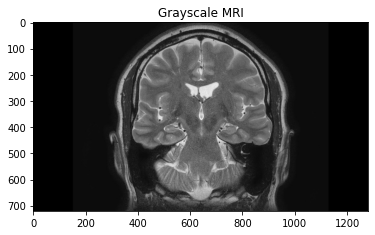

In [159]:
img = cv2.imread('mri.jpg', 0)
plt.figure()
plt.title('Grayscale MRI')
plt.imshow(img, cmap="gray")
print(f'Dim: {img.shape[1]}x{img.shape[0]}')

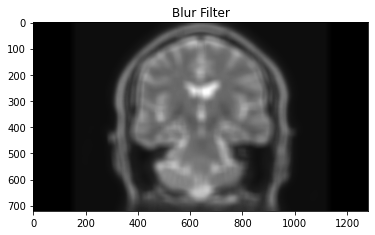

In [160]:
blurred = cv2.blur(img, (30, 30))
plt.figure()
plt.title('Blur Filter')
plt.imshow(blurred, cmap="gray")

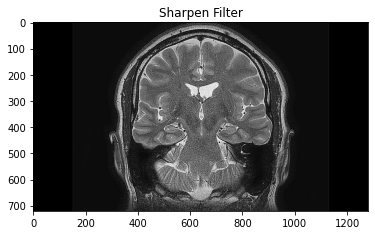

In [161]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpen_img = cv2.filter2D(img, 0, kernel)
plt.figure()
plt.title('Sharpen Filter')
plt.imshow(sharpen_img, cmap="gray")

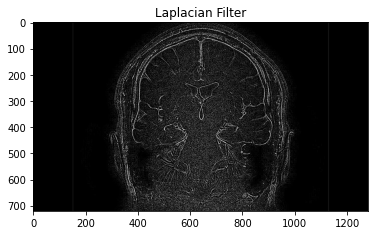

In [162]:
kernel = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
laplacian_img = cv2.filter2D(img, 0, kernel)
plt.figure()
plt.title('Laplacian Filter')
plt.imshow(laplacian_img, cmap="gray")

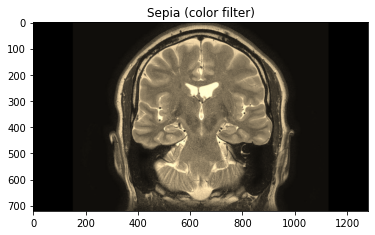

In [163]:
imgColor = cv2.imread('mri.jpg', 1)
kernel = np.array([[0.393, 0.769, 0.189],
                   [0.349, 0.686, 0.168],
                   [0.272, 0.534, 0.131]])
sepia = cv2.transform(imgColor,kernel)
plt.figure()
plt.title('Sepia (color filter)')
plt.imshow(sepia)

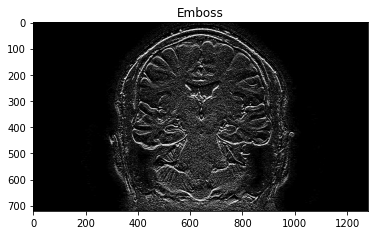

In [180]:
kernel = np.array([[0,10,0],[0,0,0],[0,-10,0]])
emboss = cv2.filter2D(img, -1, kernel)
plt.figure()
plt.title('Emboss')
plt.imshow(emboss, cmap="gray")

## Histogram Normalization

![Histogram normalization](https://docs.opencv.org/master/histogram_equalization.png)

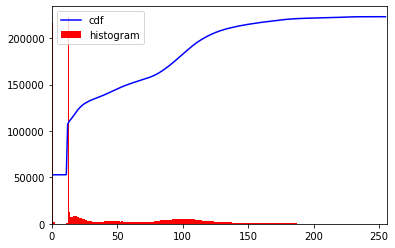

In [181]:
hist, bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()